In [1]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram

#### Constant Oracle

In [2]:
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
    
const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

#### Balanced Oracle

In [5]:
#instantiate the balanced oracle circuit

balanced_oracle = QuantumCircuit(n+1)
b_str = '101'

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

In [6]:
#this is a divider
balanced_oracle.barrier()

balanced_oracle.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░

In [7]:
#next place the CNOT gates, using each input qubit as a control

for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [8]:
#repeat the code from above, wrapping the CNOTs in X-gates

for qubit in range(len(b_str)):
    if b_str[qubit]=='1':
        balanced_oracle.x(qubit)
    
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

#### The Full Algorithm

In [16]:
#instantiate the circuit
dj_circuit = QuantumCircuit(n+1,n)

#apply H gates
for qubit in range(n):
    dj_circuit.h(qubit)
    
#put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [17]:
# apply the oracle
dj_circuit += balanced_oracle

dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [18]:
#repeat H gates
for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.barrier()

#measure
for i in range(n):
    dj_circuit.measure(i,i)

dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

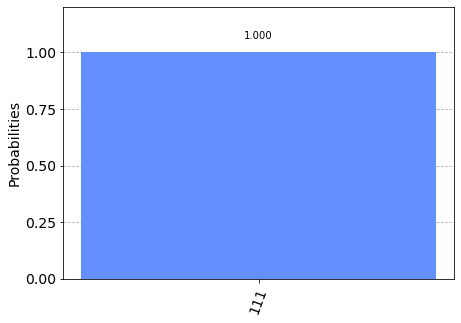

In [21]:
#check the output

aer_sim = Aer.get_backend('aer_simulator')
shots = 1024

qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()

answer = results.get_counts()

plot_histogram(answer)

#### Generalized Circuits

In [23]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    
    #first case: balanced
    if case == 'balanced':
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        
        for qubit in range(len(b_str)):
            if b_str[qubit]=='1':
                oracle_qc.x(qubit)
    
    #second case: constant
    if case == 'constant':
        output = np.random.randint(2)
        
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "oracle"
    
    return oracle_gate

In [25]:
#create a function that takes this oracle gate and performs DJ algorithm

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1,n)
    
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.append(oracle, range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i,i)
    
    return dj_circuit

In [26]:
#example
n = 4

oracle_gate = dj_oracle('balanced',n)
dj_circuit = dj_algorithm(oracle_gate, n)

dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

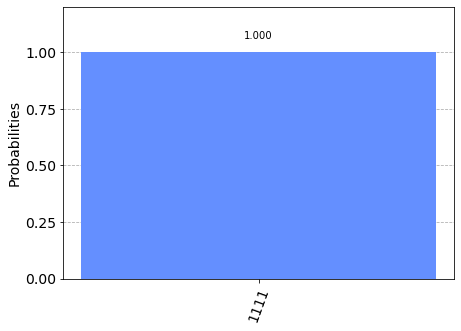

In [28]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)

qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

#### Experiment with Real Devices

In [30]:
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(
                filters = lambda x: x.configuration().n_qubits >= (n+1) and
                not x.configuration().simulator and x.status().operational==True))

print(f'least busy backend: {backend}')

ibmqfactory.load_account:WARNING:2021-07-12 11:33:21,453: Credentials are already in use. The existing account in the session will be replaced.


least busy backend: ibmqx2


In [31]:
from qiskit.tools.monitor import job_monitor

In [33]:
#run circuit on the least busy backend
shots = 1024

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval = 2)

Job Status: job has successfully run


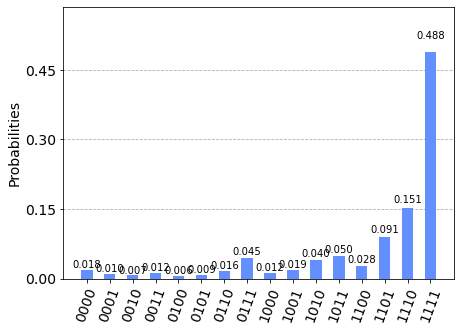

In [35]:
#get the computation results
results = job.result()
answer = results.get_counts()

plot_histogram(answer)